# Character Trajectories dataset

Link to [Official repository](https://archive-beta.ics.uci.edu/dataset/175/character+trajectories) on UC Irvine


### Data description:

Multiple, labelled samples of pen tip trajectories recorded whilst writing individual characters. All samples are from the same writer, for the purposes of primitive extraction. Only characters with a single pen-down segment were considered.

Each character sample is a 3-dimensional pen tip velocity trajectory. This is contained in matrix format, with 3 rows and T columns where T is the length of the character sample.

The characters here were used for a PhD study on primitive extraction using HMM based models. The data consists of 2858 character samples, contained in the cell array 'mixout'. The struct variable 'consts' contains a field consts.charlabels which provides ennummerated labels for the characters. consts.key provides the key for each label. The data was captured using a WACOM tablet. 3 Dimensions were kept - x, y, and pen tip force. The data has been numerically differentiated and Gaussian smoothed, with a sigma value of 2. Data was captured at 200Hz. The data was normalised with consts.datanorm. Only characters with a single 'PEN-DOWN' segment were considered. Character segmentation was performed using a pen tip force cut-off point. The characters have also been shifted so that their velocity profiles best match the mean of the set.

## Download database

Run the cell below to collect the archives in your folder.

Safe cell that will create a folder `../trajectory_dataset` (), download and overwrite the files in this folder.

In [7]:
import os 
import requests
os.mkdir("../trajectory_dataset")
r = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/character-trajectories/mixoutALL_shifted.mat")
open('../trajectory_dataset/mixoutALL_shifted.mat', 'wb').write(r.content)
r = requests.get(" https://archive.ics.uci.edu/ml/machine-learning-databases/character-trajectories/trajectories.names")

open('../trajectory_dataset/trajectories.names', 'wb').write(r.content)
# ! wget -O ../trajectory_dataset/mixoutALL_shifted.mat https://archive.ics.uci.edu/ml/machine-learning-databases/character-trajectories/mixoutALL_shifted.mat
# ! wget -O ../trajectory_dataset/trajectories.names https://archive.ics.uci.edu/ml/machine-learning-databases/character-trajectories/trajectories.names

FileExistsError: [WinError 183] Impossible de créer un fichier déjà existant: '../trajectory_dataset'

## Interacting with data

In [8]:
from scipy.io import loadmat
import numpy as np

# load data in a python dictionnary
mat = loadmat('../trajectory_dataset/mixoutALL_shifted.mat')

mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'consts', 'mixout'])

In [9]:
# Information about the dataset

n_samples = mat["mixout"][0].__len__()

print(f"Number of samples:\t {n_samples}")


# Loading samples labels
keys = mat["consts"][0,0][4]
keys = [key - 1 for key in keys[0]]

labels = mat["consts"][0,0][3]
labels = np.array([label[0] for label in labels[0]])

samples_label = labels[[keys]]

label_unique, label_count = np.unique(samples_label, return_counts=True)

print()
print("Data distribution:")
print(f"{len(label_unique)} different class")
line_u = "_______" + str.join("_", ["___" for _ in label_count]) + "_"
print(line_u)
char = "|CHAR  | " + str.join(" | ", label_unique) + " |"
print(char)
line_d = "|______|" + str.join("|", ["___" for _ in label_count]) + "|"
print(line_d)
count = "|COUNT |" + str.join("|", [str(c) for c in label_count]) + "|"
print(count)
print(line_d)


samples = mat["mixout"][0]

f_s = 200 #Hz sampling at 200Hz

print(f"\n\nN_features: \t\t{samples[0].shape[0]} ---> \t(v_x, v_y, pen_tip_force)")
print(f"Sampling frequency: \t{f_s} Hz")


Number of samples:	 2858

Data distribution:
20 different class
_______________________________________________________________________________________
|CHAR  | a | b | c | d | e | g | h | l | m | n | o | p | q | r | s | u | v | w | y | z |
|______|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|
|COUNT |171|141|142|157|186|138|127|174|125|130|141|131|124|119|133|131|155|125|137|171|
|______|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|


N_features: 		3 ---> 	(v_x, v_y, pen_tip_force)
Sampling frequency: 	200 Hz


<ipython-input-9-d784a7ea64b0>:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  samples_label = labels[[keys]]


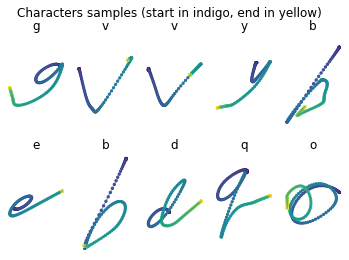

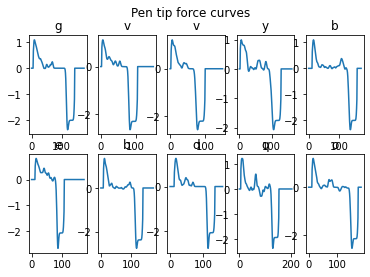

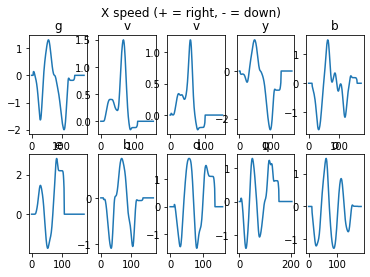

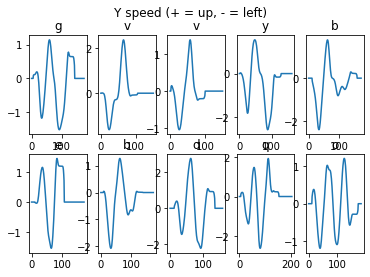

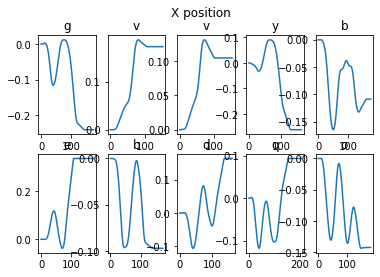

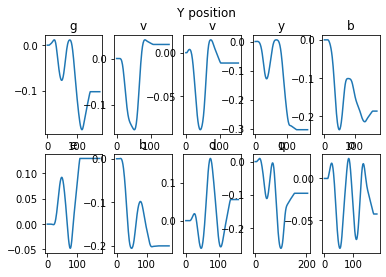

In [27]:
import matplotlib.pyplot as plt

rdm_sample_idx = np.random.randint(0, len(samples), 10)

for i, i_sample in enumerate(rdm_sample_idx):

    exsample = samples[i_sample]

    x_speed = exsample[0]
    y_speed = exsample[1]
    pen_tip_f = exsample[2]
    

    # Conversion to trajectory beggining at point (0,0)
    x = [0]
    y = [0]

    for x_v, y_v in zip(x_speed, y_speed):
        x.append(x[-1] + x_v/f_s)
        y.append(y[-1] + y_v/f_s)

    plt.subplot(2, 5, i+1)
    plt.scatter(x[:], y[:], c=np.arange(len(x)), s=5)

    # To modulate the linewidth depending on the pen tip force 
    # plt.scatter(x[1:], y[1:], c=np.arange(len(x[1:])), s=2*np.abs(pen_tip_f))
    
    plt.plot(x, y, alpha=0.5)
    
    plt.title(samples_label[i_sample])

    plt.axis('equal')
    plt.axis('off')
    #plt.colorbar()

plt.suptitle("Characters samples (start in indigo, end in yellow)")
plt.show()

for i, i_sample in enumerate(rdm_sample_idx):

    exsample = samples[i_sample]

    pen_tip_f = exsample[2]

    plt.subplot(2, 5, i+1)
    plt.plot(np.arange(len(pen_tip_f)), pen_tip_f)
    plt.title(samples_label[i_sample])

plt.suptitle("Pen tip force curves")
plt.show()

for i, i_sample in enumerate(rdm_sample_idx):

    exsample = samples[i_sample]

    x_speed = exsample[0]

    plt.subplot(2, 5, i+1)
    plt.plot(np.arange(len(x_speed)), x_speed)
    plt.title(samples_label[i_sample])

plt.suptitle("X speed (+ = right, - = down)")
plt.show()

for i, i_sample in enumerate(rdm_sample_idx):

    exsample = samples[i_sample]

    y_speed = exsample[1]

    plt.subplot(2, 5, i+1)
    plt.plot(np.arange(len(y_speed)), y_speed)
    plt.title(samples_label[i_sample])

plt.suptitle("Y speed (+ = up, - = left)")
plt.show()

for i, i_sample in enumerate(rdm_sample_idx):

    exsample = samples[i_sample]

    x_speed = exsample[0]
    y_speed = exsample[1]
    pen_tip_f = exsample[2]
    

    # Conversion to trajectory beggining at point (0,0)
    x = [0]
    y = [0]

    for x_v, y_v in zip(x_speed, y_speed):
        x.append(x[-1] + x_v/f_s)
        y.append(y[-1] + y_v/f_s)

    plt.subplot(2, 5, i+1)
    plt.plot(np.arange(len(x)), x)
    plt.title(samples_label[i_sample])

plt.suptitle("X position")
plt.show()


for i, i_sample in enumerate(rdm_sample_idx):

    exsample = samples[i_sample]

    x_speed = exsample[0]
    y_speed = exsample[1]
    pen_tip_f = exsample[2]
    

    # Conversion to trajectory beggining at point (0,0)
    x = [0]
    y = [0]

    for x_v, y_v in zip(x_speed, y_speed):
        x.append(x[-1] + x_v/f_s)
        y.append(y[-1] + y_v/f_s)

    plt.subplot(2, 5, i+1)
    plt.plot(np.arange(len(y)), y)
    plt.title(samples_label[i_sample])

plt.suptitle("Y position")
plt.show()